# Interactive Ranking

In [1]:
from sorbetto.core.entity import Entity
from sorbetto.performance.two_class_classification import TwoClassClassificationPerformance
from sorbetto.ranking.ranking import RankingInducedByScore
from sorbetto.ranking.ranking_score import RankingScore
from sorbetto.tile.empty_tile import EmptyTile
from sorbetto.parameterization import ParameterizationDefault
from random import random
import matplotlib.pyplot as plt

In [2]:
ca = Entity( TwoClassClassificationPerformance( random(), random(), random(), random() ), 'Classifier "A"' )
cb = Entity( TwoClassClassificationPerformance( random(), random(), random(), random() ), 'Classifier "B"' )
cc = Entity( TwoClassClassificationPerformance( random(), random(), random(), random() ), 'Classifier "C"' )
cd = Entity( TwoClassClassificationPerformance( random(), random(), random(), random() ), 'Classifier "D"' )
ce = Entity( TwoClassClassificationPerformance( random(), random(), random(), random() ), 'Classifier "E"' )

In [3]:
entities = [ ca, cb, cc, cd, ce ]
score = RankingScore.getF ( beta=1.0 )
ranking = RankingInducedByScore ( entities, score )

In [4]:
print ( ranking.values )

[0.5343986  0.5683926  0.73941024 0.58867369 0.7253829 ]


In [5]:
print ( ranking.getAllMinRanks() )

[5 4 1 3 2]


In [6]:
print ( ranking.getAllMaxRanks() )

[5 4 1 3 2]


In [7]:
for r in range ( len ( entities ) ) :
    print ( r+1, ':', (ranking.getEntitiesAtRank ( r+1 ) ) )

1 : [<sorbetto.core.entity.Entity object at 0x177b50650>]
2 : [<sorbetto.core.entity.Entity object at 0x177b50710>]
3 : [<sorbetto.core.entity.Entity object at 0x177b506b0>]
4 : [<sorbetto.core.entity.Entity object at 0x1776e88f0>]
5 : [<sorbetto.core.entity.Entity object at 0x16deafd70>]


plotting curve 0 1
plotting curve 0 2
plotting curve 0 3
plotting curve 0 4
plotting curve 1 2
plotting curve 1 3
plotting curve 1 4
plotting curve 2 3
plotting curve 2 4
plotting curve 3 4


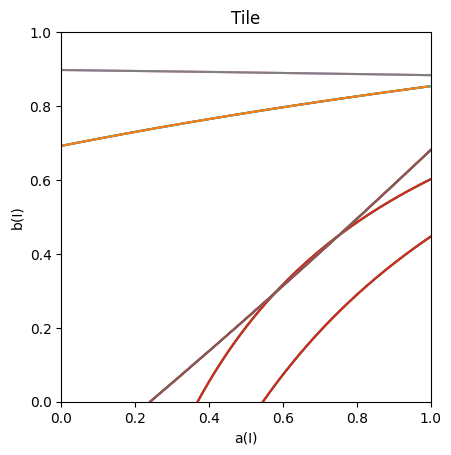

In [8]:
parameterization = ParameterizationDefault ()
min_x, max_x = parameterization.getBoundsParameter1 ()
min_y, max_y = parameterization.getBoundsParameter2 ()
extent = [ min_x, max_x, min_y, max_y ]

tile = EmptyTile ( "my tile", parameterization )

fig, ax = plt.subplots ()
tile.draw ( fig, ax )
# TODO: transform the following into an annotation
for i, entity_1 in enumerate ( entities ) :
    for j, entity_2 in enumerate ( entities ) :
        if i < j :
            print ( "plotting curve", i, j )
            curve = score.equivalent ( entity_1.performance, entity_2.performance )
            curve.draw (fig, ax, extent)
plt.show ()